In [1]:
from mfractal_mri import mfractal_mri
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

/home/grela/.local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/grela/.local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy

#### slices tests

In [4]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')

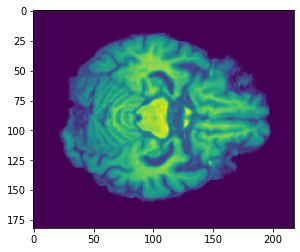

In [29]:
plt.imshow(ah.slices[55])

In [34]:
# scan_file = 'test-data/scanfile.nii.gz'
# ah = mfractal_mri()
# ah.load_scan(scan_file)
ah.slice_scan(slice_axis='y')

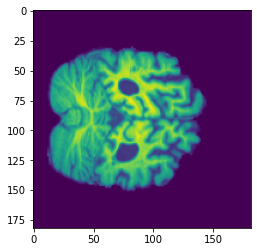

In [31]:
plt.imshow(ah.slices[55])

In [32]:
# scan_file = 'test-data/scanfile.nii.gz'
# ah = mfractal_mri()
# ah.load_scan(scan_file)
ah.slice_scan(slice_axis='x')

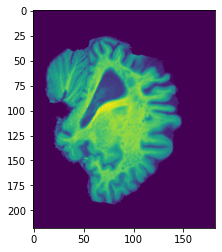

In [33]:
plt.imshow(ah.slices[55])

In [5]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')

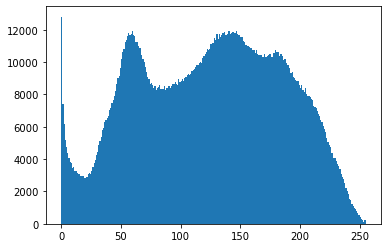

In [6]:
_ = plt.hist(ah.slices[ah.slices>0].reshape(-1),255)

##### quantization

In [7]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z', quantize_val = True)


In [13]:
ah.slices[55].min()

0

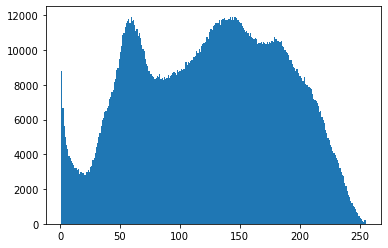

In [16]:
_ = plt.hist(ah.slices[ah.slices>0].reshape(-1),255)

#### sfc tests

In [17]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')
ah.slice_to_sfc()

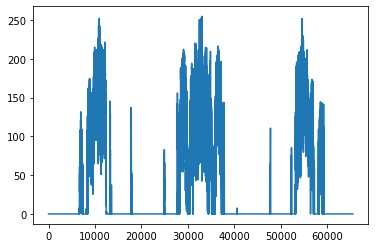

In [18]:
plt.plot(ah.sfcs[55])

##### cleaning

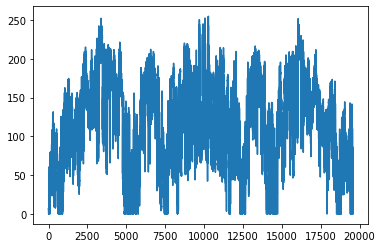

In [19]:
clean_sfc = mfractal_mri._clean_sfc(ah.sfcs[55],window_size=10)

plt.plot(clean_sfc)

In [22]:
sizes = []
for sfc in ah.sfcs:
    sizes += [len(mfractal_mri._clean_sfc(sfc,window_size=10))]

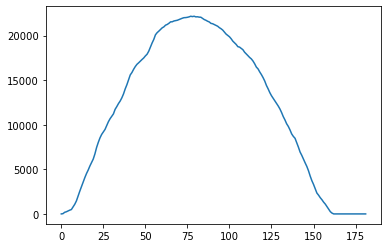

In [23]:
plt.plot(sizes)

#### mfdfa tests

In [20]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')
ah.slice_to_sfc()
ah.calc_mfdfa()

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


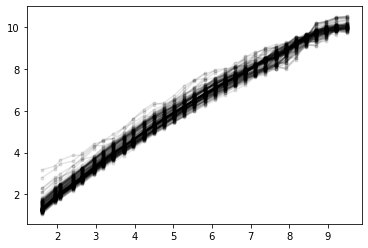

In [29]:
eps=1e-10
ii = range(ah.scales.shape[0])
# ii = [i for i in range(25)]
for i in ii:
    # i=50
    s = ah.scales[i]
    fq = ah.Fqs[i]
    plt.plot(np.log(s.astype(float)),np.log(fq[:,29].astype(float)+eps),'.-k',alpha=0.1)
    

##### mfdfa_py vs mfdfa_matlab

In [30]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')
ah.slice_to_sfc()

In [31]:
ah.calc_mfdfa(mfdfa_type='py')
Fqs_py = ah.Fqs.copy()
scales_py = ah.scales.copy()
ah.calc_mfdfa(mfdfa_type='matlab')
Fqs_matlab = ah.Fqs.copy()
scales_matlab = ah.scales.copy()

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/grela/local_project/2022.07.12-peano-resurrection/brain/peano_jg/mfractal_MRI/mfdfa.py:73: RuntimeWarning: invalid value encountered in double_scalars
  Fq[j,i] = (powerF.sum(axis=0)/(2*np.floor(N/s[j])))**(1/q[i])


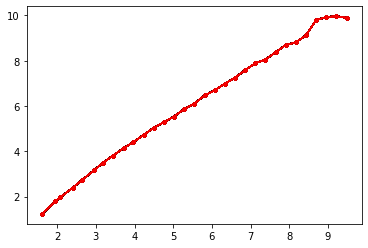

In [109]:
i0 = 50
eps=1e-10
ii = range(ah.scales.shape[0])
# ii = [i for i in range(25)]
for i in ii:
    i=i0
    s = scales_py[i]
    fq = Fqs_py[i]
    plt.plot(np.log(s.astype(float)),np.log(fq[:,29].astype(float)+eps),'.-k',alpha=0.1)
    
eps=1e-10
ii = range(ah.scales.shape[0])
# ii = [i for i in range(25)]
for i in ii:
    i=i0
    s = scales_matlab[i]
    fq = Fqs_matlab[i]
    plt.plot(np.log(s.astype(float)),np.log(fq[:,29].astype(float)+eps),'x-r',alpha=0.1)
    

In [68]:
Fqs_py = Fqs_py.astype(float)
Fqs_matlab = Fqs_matlab.astype(float)

In [143]:
# consistent results for positive Qs
err = 1e-5
d = (Fqs_py-Fqs_matlab)

d = d[:,:,22:]
d = d[~np.isnan(d)]
d = np.abs(d)
(d<err).all()

True

In [144]:
# speed comparison
ah.sfcs = ah.sfcs[::10]
%timeit ah.calc_mfdfa(mfdfa_type='py')

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


4.22 s ± 764 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [145]:
%timeit ah.calc_mfdfa(mfdfa_type='matlab')

/home/grela/local_project/2022.07.12-peano-resurrection/brain/peano_jg/mfractal_MRI/mfdfa.py:73: RuntimeWarning: invalid value encountered in double_scalars
  Fq[j,i] = (powerF.sum(axis=0)/(2*np.floor(N/s[j])))**(1/q[i])


1min 3s ± 1.73 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### hurst tests

In [5]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah.slice_scan(slice_axis='z')
ah.slice_to_sfc()
ah.calc_mfdfa()

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


##### scale presets

In [43]:
ah.calc_hurst(scale_preset='small_scales')
Hs_small = ah.Hs.copy()
Hs_err_small = ah.Hs_err.copy()
ah.calc_hurst(scale_preset='large_scales')
Hs_large = ah.Hs.copy()
Hs_err_large = ah.Hs_err.copy()
ah.calc_hurst(scale_preset='all_scales')
Hs_all = ah.Hs.copy()
Hs_err_all = ah.Hs_err.copy()

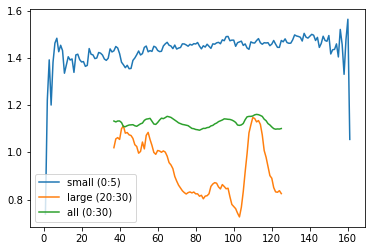

In [58]:
plt.plot(Hs_small[:,29],label='small (0:5)')
plt.plot(Hs_large[:,29],label='large (20:30)')
plt.plot(Hs_all[:,29],label='all (0:30)')
plt.legend()

In [64]:
# x = range(Hs_small.shape[0])
# plt.errorbar(x = x, y = Hs_small[:,29],yerr = np.sqrt(Hs_err_small[:,29].astype(float)),label='small (0:5)')
# plt.errorbar(x = x, y = Hs_large[:,29],yerr = np.sqrt(Hs_err_large[:,29].astype(float)),label='large (20:30)')
# plt.errorbar(x = x, y = Hs_all[:,29],yerr = np.sqrt(Hs_err_all[:,29].astype(float)),label='all (0:30)')
# plt.legend()

##### Hurst scale dependence

In [32]:
ixs = list(range(31))

In [36]:
n=5
swv = np.lib.stride_tricks.sliding_window_view
subixs = swv(ixs,window_shape=(n,))

# subixs = subixs[::n]

In [65]:
Hss = []
for subix in subixs:
    Fqs = ah.Fqs
    scales = ah.scales
    min_scale_ix = subix[0]
    max_scale_ix = subix[-1]
    Hs, _ = ah._calc_hurst(Fqs = Fqs,scales = scales, min_scale_ix = min_scale_ix, max_scale_ix = max_scale_ix)
    Hss += [Hs]
    
Hss = np.array(Hss)

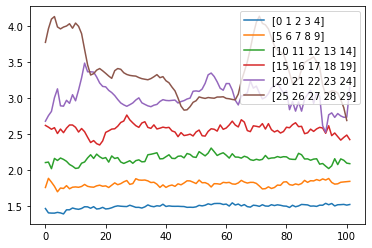

In [98]:
k=5
for i, rec in enumerate(zip(Hss[::k],subixs[::k])):
    Hs,subix = rec
    plt.plot(Hs[40:-40,29]+.5*i,label=subix)
    
plt.legend()

#### basic pipeline tests

In [99]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(nii_file = scan_file)
ah.slice_scan(slice_axis = 'z')
ah.slice_to_sfc()
ah.calc_mfdfa()
ah.calc_hurst()

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.pipeline(nii_file = scan_file,
            slice_axis='z')

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


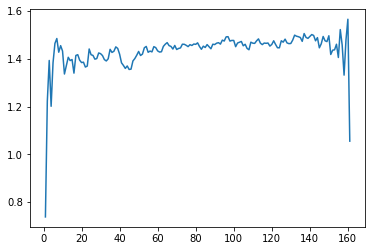

In [4]:
plt.plot(ah.Hs[:,29])

#### preprocessing tests

##### preprocess_scan flag

In [37]:
scan_file = "test-data/raw_scan.nii.gz"
ah = mfractal_mri(preprocess_scan = True)
ah.load_scan(scan_file)
ah.run_preprocessing()

KeyboardInterrupt: 

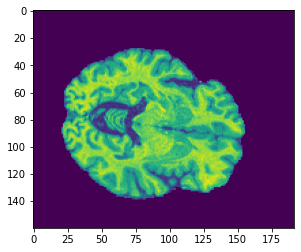

In [16]:
plt.imshow(ah.scan[:,:,100])

In [38]:
scan_file = "test-data/raw_scan.nii.gz"
ah = mfractal_mri(preprocess_scan = False)
ah.load_scan(scan_file)

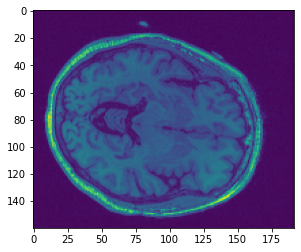

In [45]:
plt.imshow(ah.scan[:,:,100])

In [46]:
ah.slice_scan(slice_axis='z')

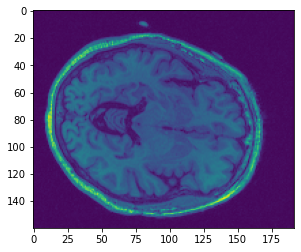

In [47]:
plt.imshow(ah.slices[100])

##### preprocessing brain_threshold param

In [36]:
scan_file = "test-data/raw_scan.nii.gz"
ah = mfractal_mri(preprocess_scan = True)
ah.load_scan(scan_file)
ah.run_preprocessing(brain_threshold = 1)

RuntimeError: /project/itksource/Modules/Filtering/Thresholding/include/itkBinaryThresholdImageFilter.hxx:221:
ITK ERROR: BinaryThresholdImageFilter(0x5643e6c62510): Lower threshold cannot be greater than upper threshold.

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])

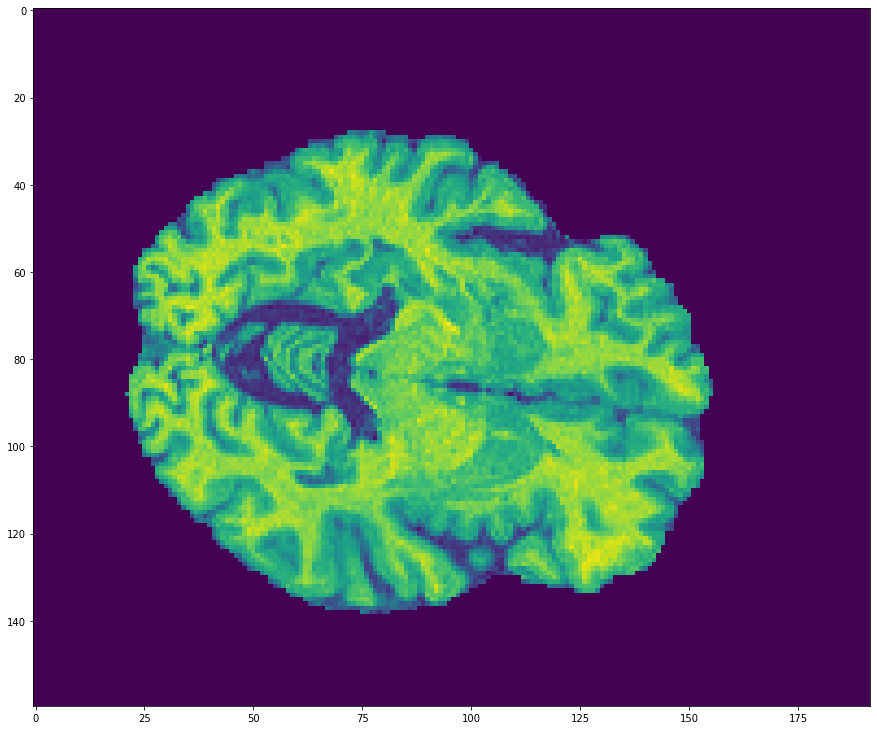

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])

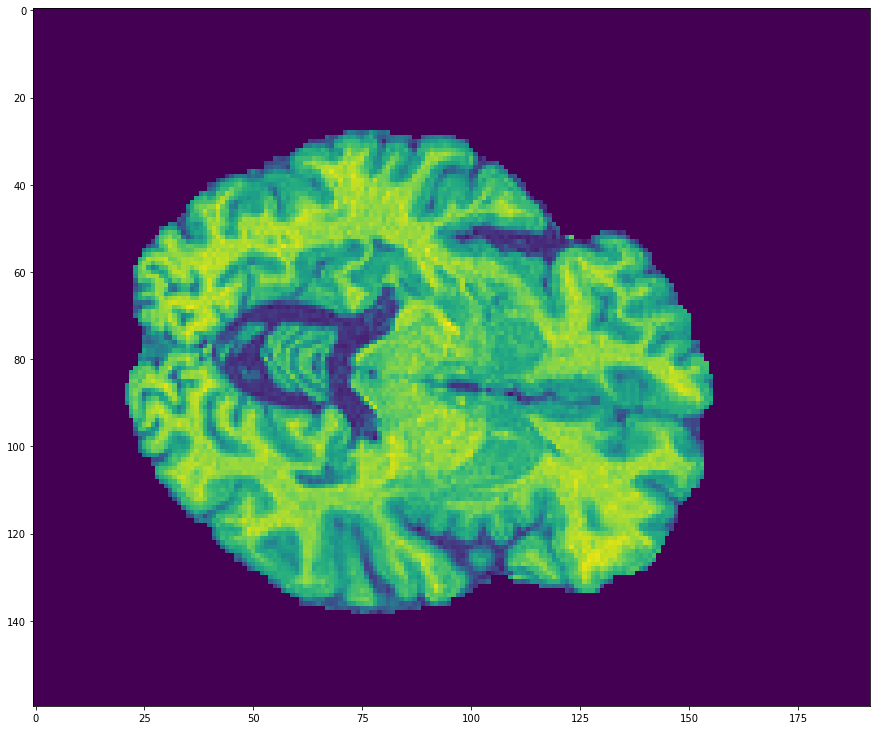

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])

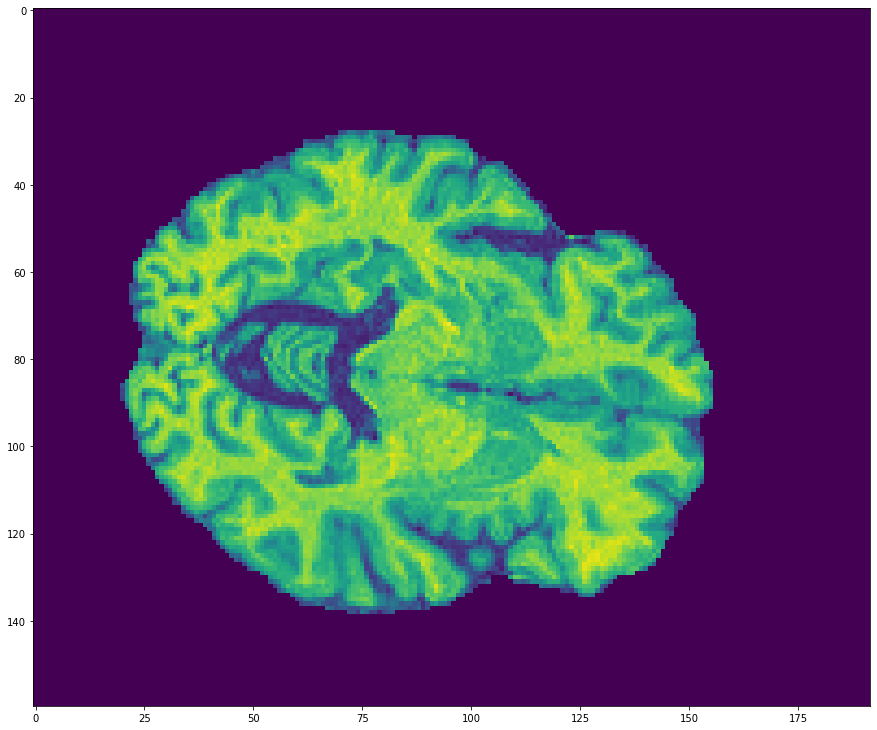

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])

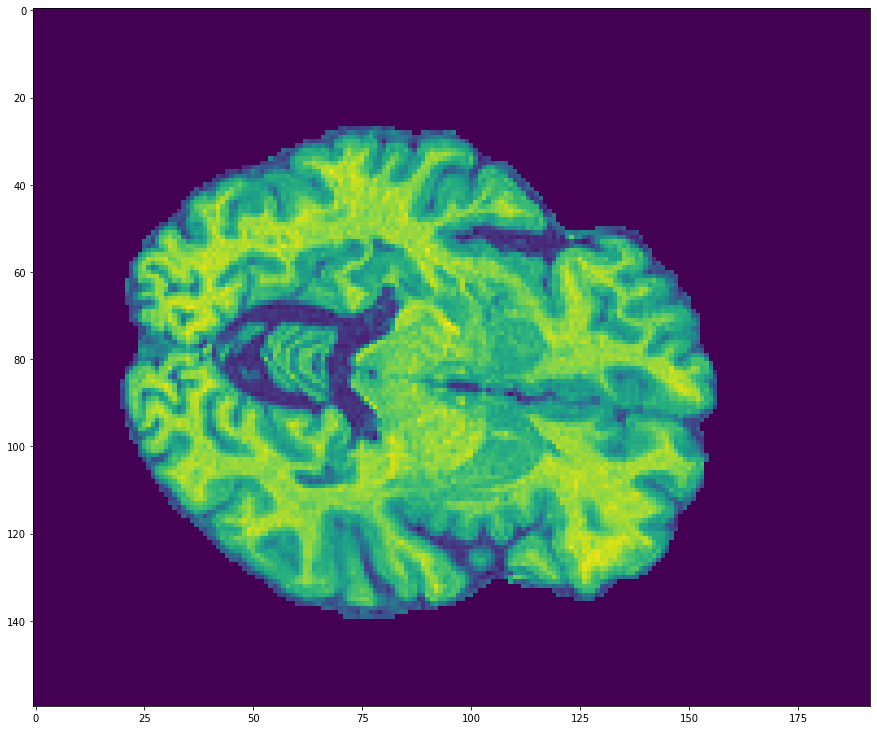

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])


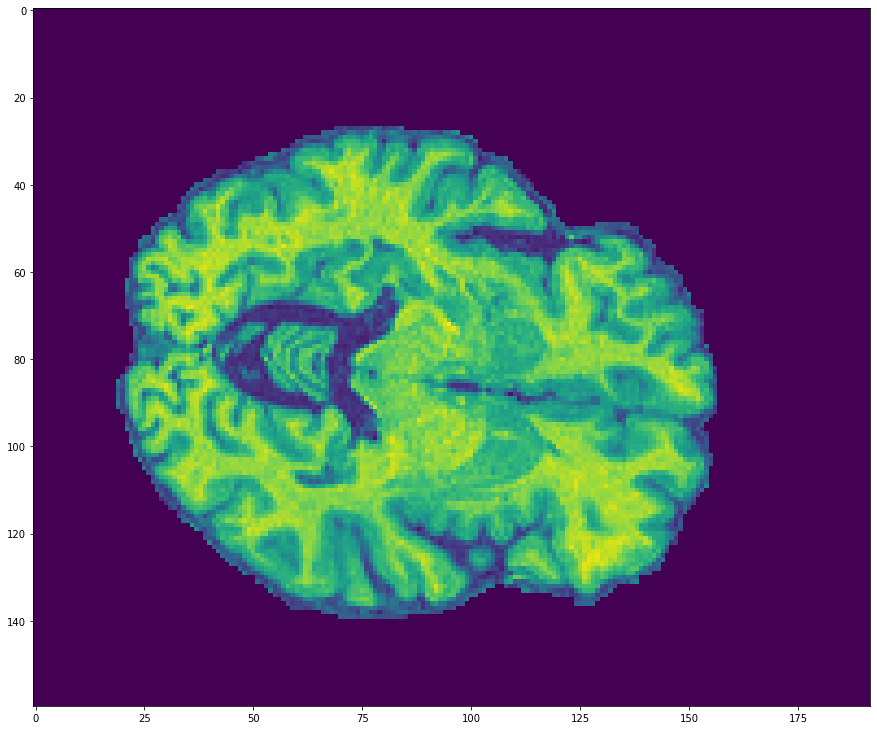

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(ah.scan[:,:,100])


##### full pipeline

In [2]:
scan_file = "test-data/raw_scan.nii.gz"
ah = mfractal_mri(preprocess_scan = True)
ah.pipeline(scan_file = scan_file)

2023-04-20 15:56:43.540701: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/grela/.mujoco/mujoco200/bin
2023-04-20 15:56:43.540741: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-20 15:56:43.540767: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (grela-XPS-13-9370): /proc/driver/nvidia/version does not exist
2023-04-20 15:56:43.541131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15

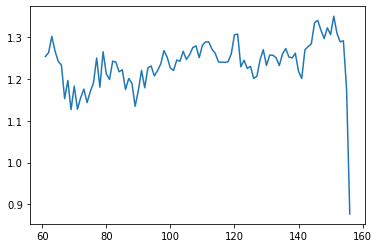

In [5]:
plt.plot(ah.Hs[:,29])

#### other tests